In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pwd

/content


In [4]:
!ls 

sample_data


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
data = pd.read_csv(r'drive/My Drive/Colab Notebooks/data_clean_v6.csv')

In [7]:
data.head()

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,ROUTE,vsby_origin,wxcodes_origin,tmpf_origin,dwpf_origin,relh_origin,sknt_origin,gust_origin,mslp_origin,vsby_destination,wxcodes_destination,tmpf_destination,dwpf_destination,relh_destination,sknt_destination,gust_destination,mslp_destination,Hourly_number_of_departure_flights,Hourly_number_of_arrival_flights,ARRIVAL_DELAY_GROUP,PRIOR_DELAY_GROUP,CHAIN,departure_KPI,arrival_KPI
0,0,1,1,4,N742SW,SFO,DEN,555,553.0,-2.0,150.0,150.0,132.0,967,09:25:00,923.0,-2.0,2015-01-01,SFO-DEN,10.0,0.0,53.96,50.00,86.41,0.0,20.0,1019.6,10.0,0.0,30.92,23.00,72.12,5.0,20.0,1023.7,32,43,-1,0.0,1.0,11.190665,5.082924
1,1,1,1,4,N742SW,DEN,MSY,1010,1011.0,1.0,150.0,159.0,138.0,1062,13:40:00,1350.0,10.0,2015-01-01,DEN-MSY,10.0,0.0,32.00,24.98,75.00,5.0,20.0,1023.7,10.0,0.0,50.00,35.06,56.30,12.0,18.0,1020.2,24,1,0,-1.0,2.0,11.836019,4.037841
2,2,1,1,4,N742SW,MSY,STL,1415,1423.0,8.0,100.0,95.0,81.0,604,15:55:00,1558.0,3.0,2015-01-01,MSY-STL,10.0,0.0,51.08,35.06,54.09,11.0,20.0,1021.0,10.0,0.0,32.00,24.08,72.24,6.0,20.0,1018.7,0,0,0,0.0,3.0,8.706255,4.204417
3,3,1,1,4,N742SW,STL,MDW,1630,1626.0,-4.0,65.0,59.0,43.0,251,17:35:00,1725.0,-10.0,2015-01-01,STL-MDW,8.0,0.0,33.08,24.98,71.82,8.0,20.0,1017.0,10.0,0.0,26.96,19.04,71.69,5.0,20.0,1014.2,0,0,-1,0.0,4.0,9.590645,2.992877
4,4,1,1,4,N742SW,MDW,DAL,1815,1812.0,-3.0,145.0,143.0,129.0,793,20:40:00,2035.0,-5.0,2015-01-01,MDW-DAL,10.0,0.0,28.04,19.04,68.57,8.0,20.0,1013.7,10.0,0.0,69.98,35.96,28.63,7.0,20.0,1018.5,0,0,-1,-1.0,5.0,12.860676,4.070864


In [93]:
data2 = data[data['CHAIN']==1]

In [94]:
data2['ARRIVAL_DELAY_GROUP'].value_counts()

-1     98821
-2     47837
 0     27464
 1      5920
 2      2528
 3      1312
 4       848
 12      633
 5       616
 6       455
 7       342
 8       292
 9       197
 10      175
 11      136
Name: ARRIVAL_DELAY_GROUP, dtype: int64

In [95]:
len(data2['ARRIVAL_DELAY_GROUP'])

187576

In [8]:
data.describe()

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,vsby_origin,wxcodes_origin,tmpf_origin,dwpf_origin,relh_origin,sknt_origin,gust_origin,mslp_origin,vsby_destination,wxcodes_destination,tmpf_destination,dwpf_destination,relh_destination,sknt_destination,gust_destination,mslp_destination,Hourly_number_of_departure_flights,Hourly_number_of_arrival_flights,ARRIVAL_DELAY_GROUP,PRIOR_DELAY_GROUP,CHAIN,departure_KPI,arrival_KPI
count,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06,1.022932e+06
mean,5.630313e+05,5.717548e+00,1.548088e+01,3.911842e+00,1.333570e+03,1.345418e+03,1.070880e+01,1.268362e+02,1.207417e+02,1.026577e+02,7.379079e+02,1.471562e+03,4.614265e+00,9.375140e+00,1.055349e-01,6.552981e+01,4.926014e+01,6.220496e+01,6.800633e+00,2.011797e+01,1.015733e+03,9.400589e+00,1.032796e-01,6.652164e+01,4.919277e+01,6.024077e+01,7.114981e+00,2.013433e+01,1.015628e+03,9.061900e+00,8.211323e+00,-1.675859e-01,-2.489843e-01,3.471083e+00,9.960716e+00,4.457061e+00
std,3.249167e+05,3.040788e+00,8.778852e+00,1.984584e+00,4.796798e+02,4.948743e+02,3.078077e+01,5.715509e+01,5.553294e+01,5.397596e+01,4.469787e+02,5.403748e+02,3.294059e+01,1.860363e+00,3.072415e-01,1.798657e+01,1.779249e+01,2.352047e+01,4.516868e+00,1.562179e+00,5.971519e+00,1.832057e+00,3.043239e-01,1.802757e+01,1.777799e+01,2.360389e+01,4.568744e+00,1.665153e+00,5.999912e+00,1.486336e+01,1.436244e+01,2.041741e+00,1.694572e+00,1.903404e+00,2.124423e+00,1.492949e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+02,1.000000e+00,-2.800000e+01,4.500000e+01,3.500000e+01,2.400000e+01,1.480000e+02,1.000000e+00,-7.300000e+01,0.000000e+00,0.000000e+00,-6.394000e+01,-2.704000e+01,1.090000e+00,0.000000e+00,1.300000e+01,9.143000e+02,0.000000e+00,0.000000e+00,-6.394000e+01,-2.704000e+01,1.090000e+00,0.000000e+00,1.200000e+01,9.143000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,1.000000e+00,3.446970e+00,3.952588e-01
25%,2.818648e+05,3.000000e+00,8.000000e+00,2.000000e+00,9.200000e+02,9.230000e+02,-3.000000e+00,8.000000e+01,7.700000e+01,6.000000e+01,3.770000e+02,1.052000e+03,-1.200000e+01,1.000000e+01,0.000000e+00,5.594000e+01,3.704000e+01,4.628000e+01,4.000000e+00,2.000000e+01,1.012400e+03,1.000000e+01,0.000000e+00,5.702000e+01,3.704000e+01,4.344000e+01,4.000000e+00,2.000000e+01,1.012300e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,8.368176e+00,3.602834e+00
50%,5.631135e+05,6.000000e+00,1.500000e+01,4.000000e+00,1.330000e+03,1.336000e+03,0.000000e+00,1.150000e+02,1.070000e+02,8.900000e+01,6.210000e+02,1.511000e+03,-4.000000e+00,1.000000e+01,0.000000e+00,6.800000e+01,5.198000e+01,6.590000e+01,6.000000e+00,2.000000e+01,1.015000e+03,1.000000e+01,0.000000e+00,6.908000e+01,5.198000e+01,6.317000e+01,7.000000e+00,2.000000e+01,1.015000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,3.000000e+00,9.782587e+00,4.204417e+00
75%,8.445882e+05,8.000000e+00,2.300000e+01,6.000000e+00,1.740000e+03,1.753000e+03,1.100000e+01,1.600000e+02,1.500000e+02,1.310000e+02,9.720000e+02,1.920000e+03,9.000000e+00,1.000000e+01,0.000000e+00,7.700000e+01,6.404000e+01,8.142000e+01,9.000000e+00,2.000000e+01,1.018800e+03,1.000000e+01,0.000000e+00,7.898000e+01,6.296000e+01,7.935000e+01,1.000000e+01,2.000000e+01,1.018700e+03,1.300000e+01,1.200000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.201726e+01,5.404241e+00
max,1.126351e+06,1.200000e+01,3.100000e+01,7.000000e+00,2.345000e+03,2.400000e+03,6.650000e+02,3.800000e+02,4.470000e+02,3.980000e+02,2.447000

In [9]:
data.columns

Index(['Unnamed: 0', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DATE', 'ROUTE', 'vsby_origin', 'wxcodes_origin',
       'tmpf_origin', 'dwpf_origin', 'relh_origin', 'sknt_origin',
       'gust_origin', 'mslp_origin', 'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination',
       'Hourly_number_of_departure_flights',
       'Hourly_number_of_arrival_flights', 'ARRIVAL_DELAY_GROUP',
       'PRIOR_DELAY_GROUP', 'CHAIN', 'departure_KPI', 'arrival_KPI'],
      dtype='object')

In [10]:
data.drop(columns=['Unnamed: 0'])

,MONTH,DAY,DAY_OF_WEEK,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,ROUTE,vsby_origin,wxcodes_origin,tmpf_origin,dwpf_origin,relh_origin,sknt_origin,gust_origin,mslp_origin,vsby_destination,wxcodes_destination,tmpf_destination,dwpf_destination,relh_destination,sknt_destination,gust_destination,mslp_destination,Hourly_number_of_departure_flights,Hourly_number_of_arrival_flights,ARRIVAL_DELAY_GROUP,PRIOR_DELAY_GROUP,CHAIN,departure_KPI,arrival_KPI
0,1,1,4,N742SW,SFO,DEN,555,553.0,-2.0,150.0,150.0,132.0,967,09:25:00,923.0,-2.0,2015-01-01,SFO-DEN,10.00,0.0,53.96,50.00,86.41,0.0,20.0,1019.6,10.00,0.0,30.92,23.00,72.12,5.0,20.0,1023.7,32,43,-1,0.0,1.0,11.190665,5.082924
1,1,1,4,N742SW,DEN,MSY,1010,1011.0,1.0,150.0,159.0,138.0,1062,13:40:00,1350.0,10.0,2015-01-01,DEN-MSY,10.00,0.0,32.00,24.98,75.00,5.0,20.0,1023.7,10.00,0.0,50.00,35.06,56.30,12.0,18.0,1020.2,24,1,0,-1.0,2.0,11.836019,4.037841
2,1,1,4,N742SW,MSY,STL,1415,1423.0,8.0,100.0,95.0,81.0,604,15:55:00,1558.0,3.0,2015-01-01,MSY-STL,10.00,0.0,51.08,35.06,54.09,11.0,20.0,1021.0,10.00,0.0,32.00,24.08,72.24,6.0,20.0,1018.7,0,0,0,0.0,3.0,8.706255,4.204417
3,1,1,4,N742SW,STL,MDW,1630,1626.0,-4.0,65.0,59.0,43.0,251,17:35:00,1725.0,-10.0,2015-01-01,STL-MDW,8.00,0.0,33.08,24.98,71.82,8.0,20.0,1017.0,10.00,0.0,26.96,19.04,71.69,5.0,20.0,1014.2,0,0,-1,0.0,4.0,9.590645,2.992877
4,1,1,4,N742SW,MDW,DAL,1815,1812.0,-3.0,145.0,143.0,129.0,793,20:40:00,2035.0,-5.0,2015-01-01,MDW-DAL,10.00,0.0,28.04,19.04,68.57,8.0,20.0,1013.7,10.00,0.0,69.98,35.96,28.63,7.0,20.0,1018.5,0,0,-1,-1.0,5.0,12.860676,4.070864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022927,12,9,3,N7823A,TPA,IND,830,824.0,-6.0,140.0,123.0,109.0,837,10:50:00,1027.0,-23.0,2015-12-09,TPA-IND,10.00,0.0,75.92,71.06,84.92,0.0,20.0,1022.4,10.00,0.0,32.00,26.06,78.45,5.0,20.0,1022.4,14,8,-2,-1.0,2.0,10.191131,4.920182
1022928,12,9,3,N7823A,IND,BOS,1120,1114.0,-6.0,125.0,128.0,112.0,818,13:25:00,1322.0,-3.0,2015-12-09,IND-BOS,9.00,0.0,33.08,26.06,75.11,5.0,20.0,1022.7,10.00,0.0,24.98,23.00,92.05,8.0,20.0,1026.5,11,19,-1,-2.0,3.0,8.191128,6.250619
1022929,12,9,3,N7823A,BOS,BWI,1400,1357.0,-3.0,95.0,90.0,68.0,369,15:35:00,1527.0,-8.0,2015-12-09,BOS-BWI,10.00,0.0,24.80,21.20,85.96,7.0,20.0,1015.0,0.25,1.0,48.02,48.02,100.00,4.0,20.0,1015.0,3,0,-1,-1.0,4.0,9.605865,3.602834
1022930,12,9,3,N7823A,BWI,FLL,1635,1630.0,-5.0,160.0,160.0,137.0,925,19:15:00,1910.0,-5.0,2015-12-09,BWI-FLL,0.25,1.0,48.20,48.20,100.00,4.0,20.0,1015.0,1.50,1.0,77.00,75.02,93.62,6.0,20.0,1015.0,0,0,-1,-1.0,5.0,13.341158,5.567045


In [11]:
data['SCHEDULED_DEPARTURE'].min()

500

In [12]:
data['SCHEDULED_DEPARTURE'].max()

2345

In [13]:
data['SCHEDULED_ARRIVAL'].min()

'00:05:00'

In [14]:
data['SCHEDULED_ARRIVAL'].max()

'23:55:00'

In [15]:
# Binning Scheduled Departure and Scheduled Arrival
data['SCHEDULED_DEPARTURE_bin'] = data['SCHEDULED_DEPARTURE'].apply(lambda x: '5am-7am' if x<=700 else
                                                               ('7am-9am' if x<=900 else
                                                               ('9am-11am' if x<=1100 else
                                                               ('11am-1pm' if x<=1300 else
                                                               ('1pm-3pm' if x<=1500 else
                                                               ('3pm-5pm' if x<=1700 else
                                                               ('5pm-7pm' if x<=1900 else
                                                               ('7pm-9pm' if x<=2100 else '9pm-12am'))))))))
data['SCHEDULED_ARRIVAL_bin'] = data['SCHEDULED_ARRIVAL'].apply(lambda x: '12am-5am' if x<='05:00:00' else
                                                               ('5am-7am' if x<='07:00:00' else
                                                               ('7am-9am' if x<='09:00:00' else
                                                               ('9am-11am' if x<='11:00:00' else
                                                               ('11am-1pm' if x<='13:00:00' else
                                                               ('1pm-3pm' if x<='15:00:00' else
                                                               ('3pm-5pm' if x<='17:00:00' else
                                                               ('5pm-7pm' if x<='19:00:00' else 
                                                                ('7pm-9pm' if x<='21:00:00' else '9pm-12am')))))))))

In [16]:
data.columns

Index(['Unnamed: 0', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DATE', 'ROUTE', 'vsby_origin', 'wxcodes_origin',
       'tmpf_origin', 'dwpf_origin', 'relh_origin', 'sknt_origin',
       'gust_origin', 'mslp_origin', 'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination',
       'Hourly_number_of_departure_flights',
       'Hourly_number_of_arrival_flights', 'ARRIVAL_DELAY_GROUP',
       'PRIOR_DELAY_GROUP', 'CHAIN', 'departure_KPI', 'arrival_KPI',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin'],
      dtype='object')

In [17]:
data['ARRIVAL_DELAY_GROUP'].value_counts()

-1     455164
 0     216981
-2     152551
 1      81640
 2      40227
 3      22795
 4      14434
 5       9871
 6       6972
 12      5857
 7       5332
 8       4006
 9       3024
 10      2295
 11      1783
Name: ARRIVAL_DELAY_GROUP, dtype: int64

In [18]:
data['CHAIN'].value_counts()

1.0     187576
2.0     184298
3.0     179319
4.0     169673
5.0     137287
6.0      92957
7.0      47736
8.0      18079
9.0       5223
10.0       734
11.0        47
12.0         3
Name: CHAIN, dtype: int64

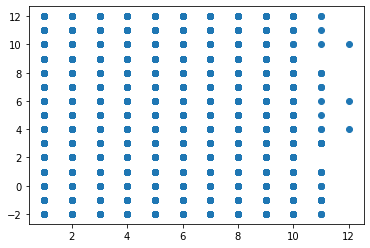

In [19]:
plt.scatter(data['CHAIN'],data['ARRIVAL_DELAY_GROUP'])
plt.show()

## LightGBM

In [20]:
import lightgbm as lgb
from sklearn import model_selection, metrics, preprocessing
import sklearn
import math

In [21]:
data['ORIGIN_AIRPORT'] = data['ORIGIN_AIRPORT'].astype('category')
data['DESTINATION_AIRPORT'] = data['DESTINATION_AIRPORT'].astype('category')
data['SCHEDULED_DEPARTURE_bin'] = data['SCHEDULED_DEPARTURE_bin'].astype('category')
data['SCHEDULED_ARRIVAL_bin'] = data['SCHEDULED_ARRIVAL_bin'].astype('category')

In [22]:
X = data[['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','PRIOR_DELAY_GROUP', 'CHAIN',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin','departure_KPI', 'arrival_KPI','vsby_origin', 'wxcodes_origin', 'tmpf_origin', 'dwpf_origin',
       'relh_origin', 'sknt_origin', 'gust_origin', 'mslp_origin',
        'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination']]
y = data['ARRIVAL_DELAY_GROUP']

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=2020, stratify=y)

In [24]:
data_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.8
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1

regr = lgb.train(params, data_train,100)

In [25]:
y_pred = regr.predict(X_test)

In [26]:
rmse_lgb = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_lgb

1.8816174849775333

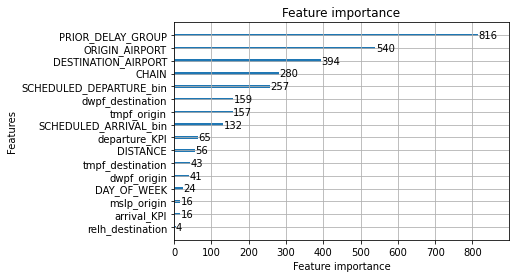

In [27]:
lgb.plot_importance(regr)

##### Try again with Chain <=6

In [28]:
data1 = data[data['CHAIN']<=6]

In [29]:
X1 = data1[['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','PRIOR_DELAY_GROUP', 'CHAIN',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin','departure_KPI', 'arrival_KPI','vsby_origin', 'wxcodes_origin', 'tmpf_origin', 'dwpf_origin',
       'relh_origin', 'sknt_origin', 'gust_origin', 'mslp_origin',
        'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination']]
y1 = data1['ARRIVAL_DELAY_GROUP']

In [30]:
X1_train, X1_test, y1_train, y1_test = model_selection.train_test_split(X1, y1, test_size = 0.2, random_state=2020, stratify=y1)

In [31]:
data_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.8
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1

regr = lgb.train(params, data_train,100)

In [32]:
y1_pred = regr.predict(X1_test)

In [33]:
rmse_lgb1 = math.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
rmse_lgb1

1.8438812975076193

#### Predict Arrival Delay

In [34]:
X2 = data[['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','PRIOR_DELAY_GROUP', 'CHAIN',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin','departure_KPI', 'arrival_KPI','vsby_origin', 'wxcodes_origin', 'tmpf_origin', 'dwpf_origin',
       'relh_origin', 'sknt_origin', 'gust_origin', 'mslp_origin',
        'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination']]
y2 = data['ARRIVAL_DELAY']

In [35]:
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size = 0.2, random_state=2020)

In [36]:
data2_train = lgb.Dataset(X2_train, label=y2_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.8
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1

regr = lgb.train(params, data2_train,100)

In [37]:
y2_pred = regr.predict(X2_test)

In [38]:
print(math.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

30.45366350170832


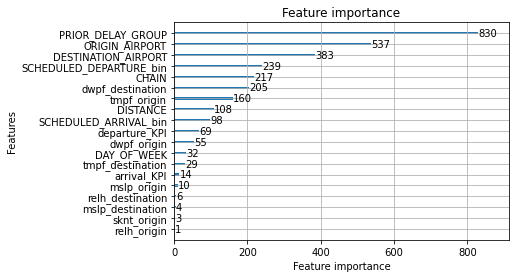

In [39]:
lgb.plot_importance(regr)

### Try again with outliers removed
##### Predict arrival delay

In [40]:
data['ARRIVAL_DELAY'].quantile([0.25,0.5,0.75,0.98,0.99])

0.25    -12.0
0.50     -4.0
0.75      9.0
0.98    109.0
0.99    148.0
Name: ARRIVAL_DELAY, dtype: float64

In [41]:
data2 = data[data['ARRIVAL_DELAY']<=110]

In [42]:
data2.describe()

,Unnamed: 0,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,vsby_origin,wxcodes_origin,tmpf_origin,dwpf_origin,relh_origin,sknt_origin,gust_origin,mslp_origin,vsby_destination,wxcodes_destination,tmpf_destination,dwpf_destination,relh_destination,sknt_destination,gust_destination,mslp_destination,Hourly_number_of_departure_flights,Hourly_number_of_arrival_flights,ARRIVAL_DELAY_GROUP,PRIOR_DELAY_GROUP,CHAIN,departure_KPI,arrival_KPI
count,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06,1.002921e+06
mean,5.628932e+05,5.717043e+00,1.548313e+01,3.913430e+00,1.328278e+03,1.338073e+03,7.572124e+00,1.267965e+02,1.205785e+02,1.025914e+02,7.376011e+02,1.472453e+03,1.354216e+00,9.374101e+00,1.055666e-01,6.542310e+01,4.918080e+01,6.224404e+01,6.790702e+00,2.011871e+01,1.015747e+03,9.398805e+00,1.034408e-01,6.641383e+01,4.910861e+01,6.028268e+01,7.103723e+00,2.013456e+01,1.015641e+03,9.198340e+00,8.336571e+00,-3.637993e-01,-3.362857e-01,3.453592e+00,9.954138e+00,4.453124e+00
std,3.249182e+05,3.049334e+00,8.783416e+00,1.984467e+00,4.796048e+02,4.902068e+02,1.960111e+01,5.716781e+01,5.547911e+01,5.397278e+01,4.470617e+02,5.320465e+02,2.220508e+01,1.861701e+00,3.072823e-01,1.797614e+01,1.779276e+01,2.352664e+01,4.518510e+00,1.560648e+00,5.979211e+00,1.834935e+00,3.045340e-01,1.802621e+01,1.778263e+01,2.362761e+01,4.570592e+00,1.663558e+00,6.007444e+00,1.493765e+01,1.444720e+01,1.488151e+00,1.431797e+00,1.898703e+00,2.124359e+00,1.490929e+00
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+02,1.000000e+00,-2.800000e+01,4.500000e+01,3.500000e+01,2.400000e+01,1.480000e+02,1.000000e+00,-7.300000e+01,0.000000e+00,0.000000e+00,-6.394000e+01,-2.704000e+01,1.090000e+00,0.000000e+00,1.300000e+01,9.143000e+02,0.000000e+00,0.000000e+00,-6.394000e+01,-2.704000e+01,1.090000e+00,0.000000e+00,1.200000e+01,9.143000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,1.000000e+00,3.446970e+00,3.952588e-01
25%,2.815540e+05,3.000000e+00,8.000000e+00,2.000000e+00,9.150000e+02,9.190000e+02,-3.000000e+00,8.000000e+01,7.700000e+01,6.000000e+01,3.770000e+02,1.052000e+03,-1.200000e+01,1.000000e+01,0.000000e+00,5.594000e+01,3.704000e+01,4.630000e+01,4.000000e+00,2.000000e+01,1.012400e+03,1.000000e+01,0.000000e+00,5.702000e+01,3.704000e+01,4.349000e+01,4.000000e+00,2.000000e+01,1.012300e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,8.368176e+00,3.602834e+00
50%,5.629680e+05,6.000000e+00,1.500000e+01,4.000000e+00,1.325000e+03,1.330000e+03,0.000000e+00,1.150000e+02,1.070000e+02,8.900000e+01,6.210000e+02,1.508000e+03,-4.000000e+00,1.000000e+01,0.000000e+00,6.800000e+01,5.198000e+01,6.604000e+01,6.000000e+00,2.000000e+01,1.015000e+03,1.000000e+01,0.000000e+00,6.908000e+01,5.198000e+01,6.321000e+01,7.000000e+00,2.000000e+01,1.015000e+03,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,3.000000e+00,9.780543e+00,4.204417e+00
75%,8.443550e+05,8.000000e+00,2.300000e+01,6.000000e+00,1.735000e+03,1.746000e+03,1.000000e+01,1.600000e+02,1.500000e+02,1.310000e+02,9.720000e+02,1.917000e+03,7.000000e+00,1.000000e+01,0.000000e+00,7.700000e+01,6.296000e+01,8.144000e+01,9.000000e+00,2.000000e+01,1.018800e+03,1.000000e+01,0.000000e+00,7.898000e+01,6.296000e+01,7.937000e+01,1.000000e+01,2.000000e+01,1.018700e+03,1.300000e+01,1.200000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.201726e+01,5.404241e+00
max,1.126351e+06,1.200000e+01,3.100000e+01,7.000000e+00,2.345000e+03,2.400000e+03,1.520000e+02,3.800000e+02,4.470000e+02,3.980000e+02,2.447000

In [43]:
X3 = data2[['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','PRIOR_DELAY_GROUP', 'CHAIN',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin','departure_KPI', 'arrival_KPI','vsby_origin', 'wxcodes_origin', 'tmpf_origin', 'dwpf_origin',
       'relh_origin', 'sknt_origin', 'gust_origin', 'mslp_origin',
        'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination']]
y3 = data2['ARRIVAL_DELAY']

In [44]:
X3_train, X3_test, y3_train, y3_test = model_selection.train_test_split(X3, y3, test_size = 0.2, random_state=2020)

In [45]:
data3_train = lgb.Dataset(X3_train, label=y3_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.8
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1

regr = lgb.train(params, data3_train,100)

In [46]:
y3_pred = regr.predict(X3_test)

In [47]:
print(math.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

20.246024428248425


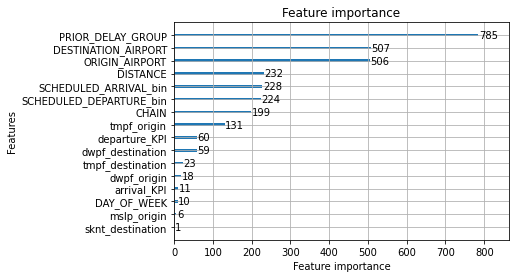

In [48]:
lgb.plot_importance(regr)

##### Predict arrival delay group

In [49]:
X4 = data2[['DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','DISTANCE','PRIOR_DELAY_GROUP', 'CHAIN',
       'SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin','departure_KPI', 'arrival_KPI','vsby_origin', 'wxcodes_origin', 'tmpf_origin', 'dwpf_origin',
       'relh_origin', 'sknt_origin', 'gust_origin', 'mslp_origin',
        'vsby_destination', 'wxcodes_destination',
       'tmpf_destination', 'dwpf_destination', 'relh_destination',
       'sknt_destination', 'gust_destination', 'mslp_destination']]
y4 = data2['ARRIVAL_DELAY_GROUP']

In [50]:
X4_train, X4_test, y4_train, y4_test = model_selection.train_test_split(X4, y4, test_size = 0.2, random_state=2020, stratify=y4)

In [51]:
data4_train = lgb.Dataset(X4_train, label=y4_train)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.8
params['num_leaves'] = 31
params['min_data'] = 20
params['max_depth'] = -1

regr = lgb.train(params, data4_train,100)

In [52]:
y4_pred = regr.predict(X4_test)
y4_pred

array([-0.55486543, -0.53029148, -0.55158705, ..., -0.15404679,
       -0.52118245, -0.48981919])

In [53]:
y4_pred_round = [round(x) for x in y4_pred]

In [54]:
print(math.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

1.3646136757813283


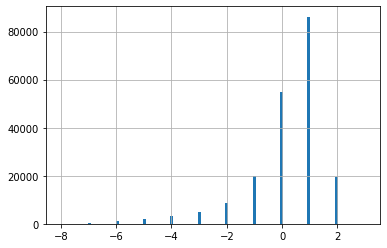

In [55]:
pd.Series(y4_pred_round - y4_test).hist(bins=100)

In [56]:
85000/len(y4_test)

0.4237605005359324

In [57]:
accuracy = 0
for r,l in zip(y4_pred_round,y4_test):
    if r==l:
        accuracy+=1
    else:
        accuracy+=0
accuracy/len(y4_test)

0.27431263554104246

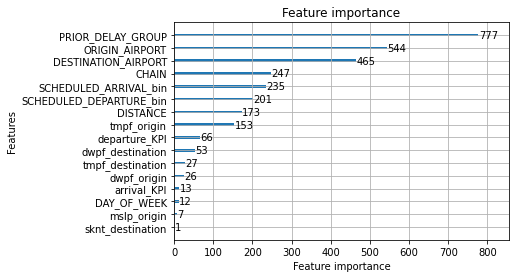

In [58]:
lgb.plot_importance(regr)

##### Lightgbm Classifier

In [59]:
clf = lgb.LGBMClassifier()

In [60]:
clf.fit(X4_train, y4_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [61]:
y4_pred_clf = clf.predict(X4_test)
y4_pred_clf

array([-2, -1, -1, ...,  0, -1, -1])

In [62]:
accuracy = 0
for r,l in zip(y4_pred_clf,y4_test):
    if r==l:
        accuracy+=1
    else:
        accuracy+=0
accuracy/len(y4_test)

0.5120921305182342

In [63]:
print(math.sqrt(metrics.mean_squared_error(y4_test, y4_pred_clf)))

1.2450325056500067


## Catboost
##### Predict arrival delay

In [65]:
pip install catboost

     |████████████████████████████████| 64.8MB 46kB/s 


In [66]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [67]:
categorical = ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE_bin', 'SCHEDULED_ARRIVAL_bin']

In [68]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]
categorical_features_indices = column_index(X3, categorical)
categorical_features_indices

array([1, 2, 6, 7])

In [69]:
model = CatBoostRegressor(iterations=200, depth=7, learning_rate=0.01,loss_function='RMSE')

In [70]:
model.fit(X3_train, y3_train, cat_features=categorical_features_indices, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 22.1421726	total: 962ms	remaining: 3m 11s
1:	learn: 22.0579709	total: 1.7s	remaining: 2m 47s
2:	learn: 21.9759872	total: 2.72s	remaining: 2m 58s
3:	learn: 21.8954262	total: 3.75s	remaining: 3m 3s
4:	learn: 21.8152402	total: 4.73s	remaining: 3m 4s
5:	learn: 21.7365549	total: 5.59s	remaining: 3m
6:	learn: 21.6596695	total: 6.43s	remaining: 2m 57s
7:	learn: 21.5836610	total: 7.27s	remaining: 2m 54s
8:	learn: 21.5098573	total: 8.23s	remaining: 2m 54s
9:	learn: 21.4362637	total: 9.07s	remaining: 2m 52s
10:	learn: 21.3645695	total: 10s	remaining: 2m 52s
11:	learn: 21.2930732	total: 10.9s	remaining: 2m 50s
12:	learn: 21.2220888	total: 11.6s	remaining: 2m 46s
13:	learn: 21.1522854	total: 12.4s	remaining: 2m 45s
14:	learn: 21.0837636	total: 13.2s	remaining: 2m 43s
15:	learn: 21.0166504	total: 14s	remaining: 2m 40s
16:	learn: 20.9509890	total: 14.9s	remaining: 2m 40s
17:	learn: 20.8873273	total: 15.7s	remaining: 2m 38s
18:	learn: 20.8231086	total: 16.5s	remaining: 2m 37s
19:	learn: 20.

In [71]:
y5_pred = model.predict(X3_test)

In [72]:
print(math.sqrt(metrics.mean_squared_error(y3_test, y5_pred)))

17.198834452865107


In [73]:
y5_pred_round = [round(x) for x in y5_pred]

In [74]:
accuracy = 0
for r,l in zip(y5_pred_round,y4_test):
    if r==l:
        accuracy+=1
    else:
        accuracy+=0
accuracy/len(y4_test)

0.0723733080738839

##### Predict arrival delay group

In [75]:
model = CatBoostRegressor(iterations=250, depth=7, learning_rate=0.01,loss_function='RMSE')

In [76]:
model.fit(X4_train, y4_train, cat_features=categorical_features_indices, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.4825815	total: 879ms	remaining: 3m 38s
1:	learn: 1.4771112	total: 1.65s	remaining: 3m 24s
2:	learn: 1.4716911	total: 2.65s	remaining: 3m 37s
3:	learn: 1.4664340	total: 3.67s	remaining: 3m 45s
4:	learn: 1.4611911	total: 4.65s	remaining: 3m 48s
5:	learn: 1.4560474	total: 5.52s	remaining: 3m 44s
6:	learn: 1.4510247	total: 6.35s	remaining: 3m 40s
7:	learn: 1.4460594	total: 7.19s	remaining: 3m 37s
8:	learn: 1.4411476	total: 8.15s	remaining: 3m 38s
9:	learn: 1.4363280	total: 8.94s	remaining: 3m 34s
10:	learn: 1.4315440	total: 9.73s	remaining: 3m 31s
11:	learn: 1.4269058	total: 10.7s	remaining: 3m 31s
12:	learn: 1.4223030	total: 11.3s	remaining: 3m 26s
13:	learn: 1.4177783	total: 12.3s	remaining: 3m 26s
14:	learn: 1.4133927	total: 13.1s	remaining: 3m 24s
15:	learn: 1.4090626	total: 14s	remaining: 3m 25s
16:	learn: 1.4047624	total: 14.9s	remaining: 3m 24s
17:	learn: 1.4006049	total: 15.7s	remaining: 3m 22s
18:	learn: 1.3965358	total: 16.7s	remaining: 3m 22s
19:	learn: 1.3924771	tot

In [77]:
y6_pred = model.predict(X4_test)

In [78]:
y6_pred_round = [round(x) for x in y6_pred]

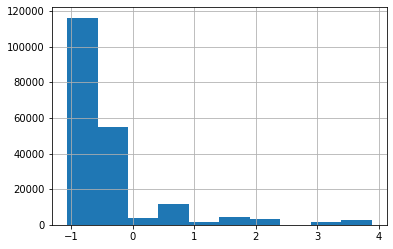

In [79]:
pd.Series(y6_pred).hist()

In [80]:
accuracy = 0
for r,l in zip(y6_pred_round,y4_test):
    if r==l:
        accuracy+=1
    else:
        accuracy+=0
accuracy/len(y4_test)

0.4754792232719296

In [81]:
print(math.sqrt(metrics.mean_squared_error(y4_test, y6_pred)))

1.1541048835772132


In [ ]:
y6 = pd.Series(y6_pred_round)

In [ ]:
y6[y6==y4_test]

ValueError: Can only compare identically-labeled Series objects

In [ ]:
y6

0        -1.0
1        -1.0
2        -1.0
3        -0.0
4        -1.0
         ... 
200580   -1.0
200581   -1.0
200582    0.0
200583   -1.0
200584   -1.0
Length: 200585, dtype: float64

In [ ]:
y4 = y4_test.reset_index(drop=True)

In [ ]:
y4[y4==y6].value_counts()

-1    74698
 0    15645
 1     3534
 2     1013
 3      680
Name: ARRIVAL_DELAY_GROUP, dtype: int64

In [ ]:
y4.value_counts()

-1    91033
 0    43396
-2    30510
 1    16328
 2     8046
 3     4559
 4     2887
 5     1974
 6     1395
 7      457
Name: ARRIVAL_DELAY_GROUP, dtype: int64

##### Catboost Classifier

In [88]:
model_clf = CatBoostClassifier(iterations=2000,task_type="GPU",devices='0:1')

In [89]:
model_clf.fit(X4_train, y4_train, cat_features=categorical_features_indices, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.101702
0:	learn: 2.1187266	total: 177ms	remaining: 8m 52s
1:	learn: 1.9934661	total: 326ms	remaining: 8m 8s
2:	learn: 1.8798468	total: 456ms	remaining: 7m 35s
3:	learn: 1.7826920	total: 577ms	remaining: 7m 12s
4:	learn: 1.7063506	total: 702ms	remaining: 7m
5:	learn: 1.6465318	total: 811ms	remaining: 6m 44s
6:	learn: 1.5971435	total: 919ms	remaining: 6m 33s
7:	learn: 1.5561227	total: 1.02s	remaining: 6m 21s
8:	learn: 1.5224253	total: 1.13s	remaining: 6m 15s
9:	learn: 1.4938107	total: 1.24s	remaining: 6m 9s
10:	learn: 1.4692909	total: 1.34s	remaining: 6m 3s
11:	learn: 1.4483416	total: 1.44s	remaining: 5m 58s
12:	learn: 1.4298076	total: 1.54s	remaining: 5m 54s
13:	learn: 1.4138621	total: 1.65s	remaining: 5m 52s
14:	learn: 1.4002502	total: 1.76s	remaining: 5m 50s
15:	learn: 1.3879294	total: 1.86s	remaining: 5m 47s
16:	learn: 1.3772970	total: 1.97s	remaining: 5m 45s
17:	learn: 1.3680428	total: 2.08s	remaining: 5m 44s
18:	learn: 1.3598288	total: 2.18s	remaining: 5m 42s

In [90]:
y7_pred = model_clf.predict(X4_test)

In [91]:
accuracy = 0
for r,l in zip(y7_pred,y4_test):
    if r==l:
        accuracy+=1
    else:
        accuracy+=0
accuracy/len(y4_test)

0.5176359149487748

In [92]:
print(math.sqrt(metrics.mean_squared_error(y7_pred, y4_pred)))

0.9792331030881019


In [ ]:
pd.Series(y7_pred[:,0]).value_counts()

-1    142621
 0     23737
-2     15183
 1      8662
 2      4427
 3      2360
 4      1483
 5      1142
 6       844
 7       126
dtype: int64